---

## Introduction

Empirical Orthogonal Functions, or EOFs, are commonly used to study the spatial __and__ temporal variability of geophysical fields like sea surface temperature. Similar to how Fourier analysis allows us to decompose a time-series into a sum of sinusoids of different frequencies, EOF analysis allows us to decompose a geophysical field into a set of mutually orthogonal spatial patterns and corresponding time series that are determined by the data (so, empirically). The input for EOF analysis is a multi-dimensional data set, _e.g_, one that is a function of lat, lon and time.  Alternately, you could perform EOFs on data that are functions of depth and time.  The result of an EOF is the data set broken down into it's principal, orthogonal components.  These in include a spatial representation and temporal multiplier.  Terminology varies, and sometimes EOFs are referred to as Principal Component Analysis, and the resulting "map" and time-series as Eigenvalues/vectors or principal components. 

Each EOF-PC pair can be thought of as a __mode of variability__ in the data, but it is not necessary that these modes represent something physical. Each mode comes with a corresponding variance fraction that tells us how important the mode is. This is often phrased something like "the first mode explains 25% of the variance in the data," and we will discuss what this means mathematically in the following sections. If a mode explains a large fraction of the total variance, it is more likely to be capturing some physical mode of variability, like the [El Niño Southern Oscillation (ENSO)](https://www.ncei.noaa.gov/access/monitoring/enso/) or [Pacific Decadal Oscillation (PDO)](https://www.ncei.noaa.gov/access/monitoring/pdo/). As an example, an EOF analysis of SST in the Pacific shows ENSO and PDO as follows (from https://climate-dynamics.org/separating-physically-distinct-influences-on-pacific-sea-surface-temperature-variability/2/):


## Deriving the eigenvalue problem

As an aside, it is not obvious why solving the eigenvalue problem for the covariance matrix results in spatial patterns that align well with the data. The following explanation follows those given by Preisendorfer [1988].

Let $f(x, t)$ be a geophysical field recorded over locations $x_1, x_2, \dots, x_M$ and times $t_1, t_2, \dots, t_N$. In matrix notation, we can write each map of $M$ locations as the column vector $\mathbf{f}_n=\begin{bmatrix}f_{1n} & f_{2n} & \cdots & f_{Mn}\end{bmatrix}^\mathrm T$, where $n=1, \dots, N$. We then have an $M\times N$ matrix that can be written as $\mathbf F=\begin{bmatrix}\mathbf{f}_1 & \mathbf{f}_2 & \cdots & \mathbf{f}_N\end{bmatrix}$. 

Now, imagine that we only have three locations to collect data. Then each $\mathbf{f}_n$ would be a 3-dimensional vector, and the whole set could be represented as a linear combination of three arbitrary basis vectors. This generalizes such that the vector space $\mathbf F$ is spanned by an arbirary unit basis $\{\mathbf u_1,\mathbf u_2,\dots,\mathbf u_M\}$. It is very likely that some of the vectors $\mathbf f_n$ are correlated as a result of some physical process. The goal of the EOF analysis is then to find an orthogonal unit basis $\{\mathbf e_1,\mathbf e_2,\dots,\mathbf e_M\}$ that aligns well with these vector "clusters". 

<img src= 'images/peixoto_b1.PNG'>

This is now an optimization problem. To maximize the alignment between the basis and observations, we will maximize the projection of the vectors $\mathbf f_n$ onto each basis vector using the sum of squares:
\begin{equation}
\sum_{n=1}^N(\mathbf f_n \cdot \mathbf e_m)^2
\end{equation}
for $m=1, 2, \dots, M$. We also require mutual orthonormality for the basis: $\mathbf e_i\cdot\mathbf e_j=\delta_{ij}$. Now, let's define this quantity as $\psi(\mathbf e_m)$:
\begin{equation}
\begin{aligned}
\psi(\mathbf e_m)\equiv\sum_{n=1}^N(\mathbf f_n \cdot \mathbf e_m)^2
&=\sum_{n=1}^N(\mathbf e_m^\mathrm T \mathbf f_n)(\mathbf f_n^\mathrm T\mathbf e_m)\\
&=\mathbf e_m^\mathrm T \sum_{n=1}^N(\mathbf f_n\mathbf f_n^\mathrm T\mathbf) e_m\\
&=\mathbf e_m^\mathrm T \mathbf F\mathbf F^\mathrm T\mathbf e_m\\
&=\mathbf e_m^\mathrm T \mathbf R\mathbf e_m
\end{aligned}
\end{equation}
where $\mathbf R=\mathbf F\mathbf F^\mathrm T$ is the covariance matrix of $\mathbf F$.

We now seek the extrema of $\psi(\mathbf e)$ (dropping the subscript $m$ for convenience), which satisfy $\psi(\mathbf e+\delta\mathbf e)=\psi(\mathbf e)$ for a small change $\delta\mathbf e$ in the direction of $\mathbf e$. Then
\begin{equation}
\begin{aligned}
\psi(\mathbf e+\delta\mathbf e)&=(\mathbf e+\delta\mathbf e)^\mathrm T\mathbf R(\mathbf e+\delta\mathbf e)\\
&=\mathbf e^\mathrm T\mathbf R\mathbf e+2(\delta\mathbf e)^\mathrm T\mathbf R\mathbf e + (\delta\mathbf e)^\mathrm T\mathbf R\delta\mathbf e\\
&\approx\mathbf e^\mathrm T\mathbf R\mathbf e+2(\delta\mathbf e)^\mathrm T\mathbf R\mathbf e\\
&=\psi(\mathbf e)+2(\delta\mathbf e)^\mathrm T\mathbf R\mathbf e
\end{aligned}
\end{equation}
where we only keep the terms first order in $\delta\mathbf e$. The optimization condition implies
\begin{equation}
(\delta\mathbf e)^\mathrm T\mathbf R\mathbf e=0
\end{equation}
By the orthonormality of the basis, we also require that these variations only change the direction of $\mathbf e$, so $(\mathbf e+\delta\mathbf e)^\mathrm T(\mathbf e+\delta\mathbf e)=1\Rightarrow(\delta\mathbf e)^\mathrm T\mathbf e=0$, again only keeping terms first order in $\delta\mathbf e$. We can combine these two conditions, provided that we multiply the orthonormality condition by a constant that has the same units as the entries of $\mathbf R$:
\begin{equation}
(\delta\mathbf e)^\mathrm T\mathbf R\mathbf e-\lambda(\delta\mathbf e)^\mathrm T\mathbf e=(\delta\mathbf e)^\mathrm T[\mathbf R\mathbf e-\lambda\mathbf e]=0
\end{equation}
Since $\delta\mathbf e$ is arbitrary, we must have $\mathbf R\mathbf e-\lambda\mathbf e=0$, the eigenvalue problem for $\mathbf R$, or for nontrivial solutions, $|\mathbf R-\lambda\mathbf I|=0$.

## The method

The steps required to compute EOFs and PCs are as follows:
1. Organize your data into a 2-dimensional matrix $\mathbf F$ and remove the mean from each time series
1. Calculate the covariance matrix $\mathbf R=\mathbf F\mathbf F^\mathrm T$
1. Find the eigenvectors (EOFs) $\mathbf e_m\in\mathbf E$ and eigenvalues $\lambda_m\in\mathbf\Lambda$ of $\mathbf R$ by solving $\mathbf R\mathbf E=\mathbf\Lambda\mathbf E$
1. Order the eigenvectors by their eigenvalues, since the eigenvalues are proportional to the fraction of variance explained by that mode
1. Calculate the PCs for each mode with $\mathbf c_m=\mathbf e_m^\mathrm T\cdot\mathbf F$ (i.e. projecting your data onto each eigenvector/EOF)
1. Find the variance fraction for each mode with $\lambda_m\Large/\normalsize\sum_i^M\lambda_i$

# Finding Climate Modes with EOFs

There are many different ways to do EOF's in python.  Here we explore two such ways: eof and xeof

<font color='red'>NOTE: First need to add these two packages:
1. open terminal
2. conda activate ges471
3. conda install -y xeofs
4. conda install -y eofs
</font>

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import xeofs as xe
from eofs.standard import Eof
from netCDF4 import Dataset
from scipy import signal

We will use the NOAA Optimally Interpolated Sea Surface Temperature product found at https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.html (THREDDS/OPeNDAP catalog at https://psl.noaa.gov/thredds/catalog/Datasets/noaa.oisst.v2/catalog.html

In [2]:
# First get SST data
url1 = 'http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2/sst.mnmean.nc'

In [3]:
ncin = Dataset(url1, 'r')
sst  = ncin.variables['sst'][1:229,:,:] #1982 to 2000
lat  = ncin.variables['lat'][:]
lon  = ncin.variables['lon'][:]
ncin.close()

nt,nlat,nlon = sst.shape    
print(sst.shape )

(228, 180, 360)


In [4]:
# Next get land mask
url2 = 'http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2/lsmask.nc'

In [5]:
lmset  = Dataset(url2)
lsmask = lmset['mask'][0,:,:]# read land mask
lsmask = lsmask-1

num_repeats = nt
lsm = np.stack([lsmask]*num_repeats,axis=-1).transpose((2,0,1))
lsm.shape

(228, 180, 360)

In [6]:
# detrend and remove seasonal cycle
sst = sst.reshape((nt,nlat*nlon), order='F')
sst_detrend = signal.detrend(sst, axis=0, type='linear', bp=0)
sst_detrend = sst_detrend.reshape((12,int(nt/12), nlat,nlon), order='F').transpose((1,0,2,3))

print(sst_detrend.shape)

(19, 12, 180, 360)


In [7]:
sst_season = np.mean(sst_detrend, axis=0)
sst_diff = sst_detrend - sst_season
sst_diff = sst_diff.transpose((1,0,2,3)).reshape((nt, nlat,nlon), order='F')

In [8]:
# mask land
sst_diff = np.ma.masked_array(sst_diff, mask=lsm)
sst_diff[lsm<0] = np.nan

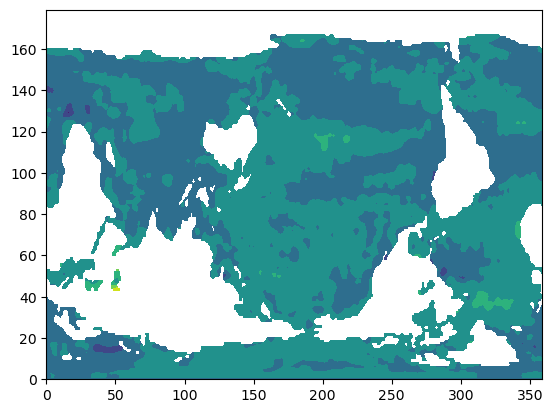

In [9]:
plt.contourf(sst_diff[0,:,:])

## Run EOF

In [10]:
wgts   = np.cos(np.deg2rad(lat))
wgts   = wgts.reshape(len(wgts), 1)
solver = Eof(sst_diff, weights=wgts)

In [11]:
eof1 = solver.eofs(neofs=10)
pc1  = solver.pcs(npcs=10, pcscaling=0)
varfrac = solver.varianceFraction()
lambdas = solver.eigenvalues()

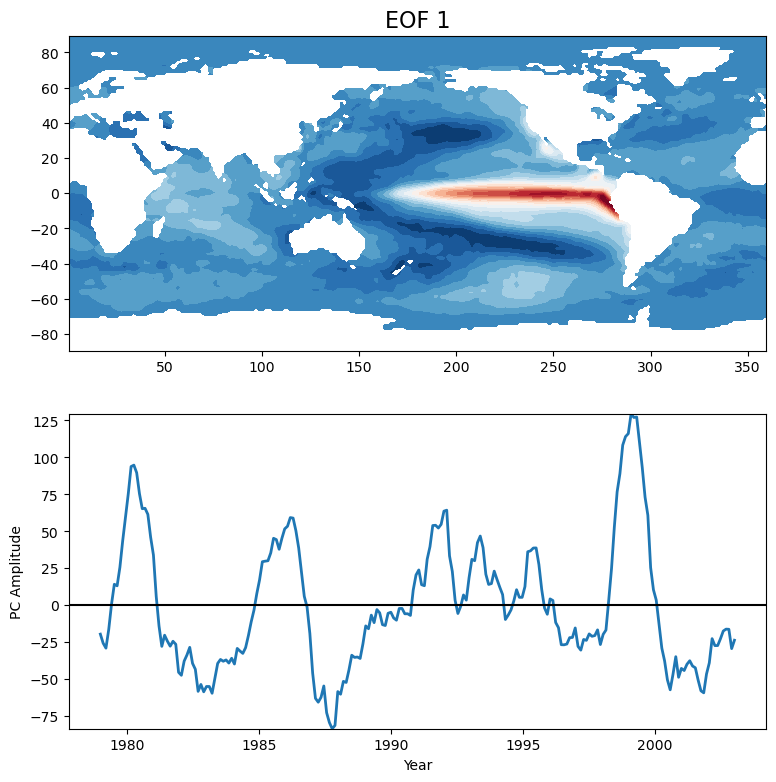

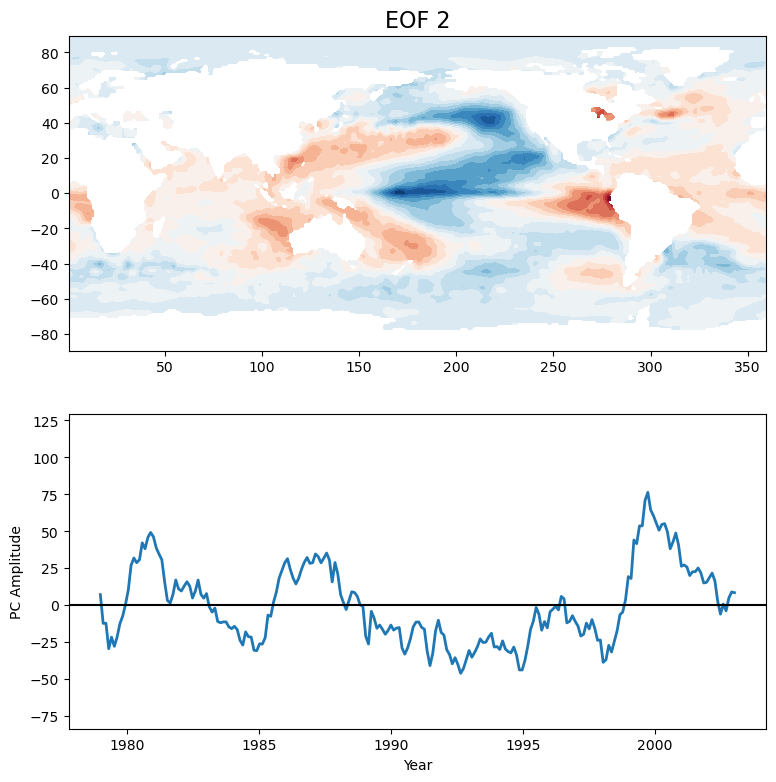

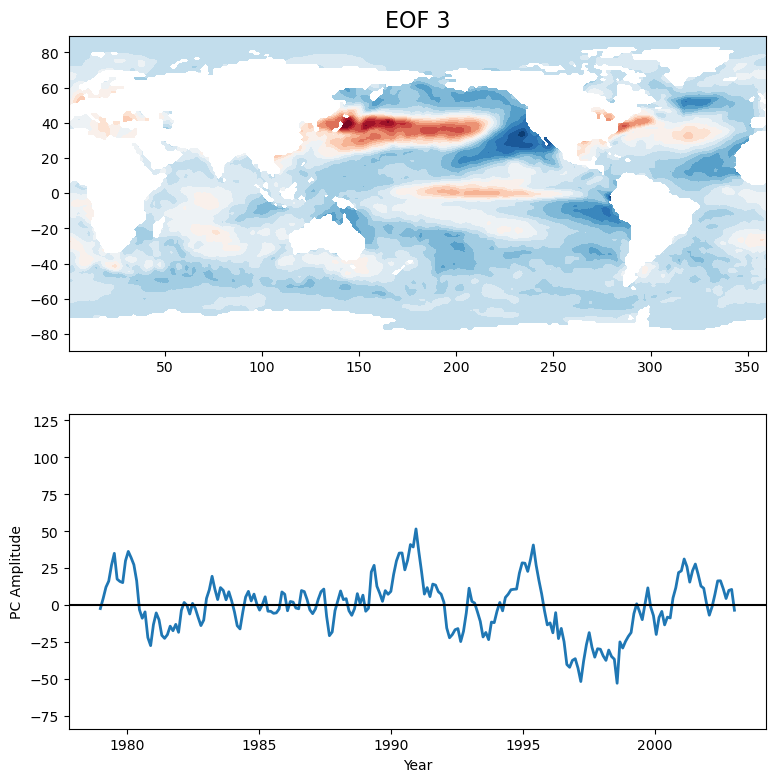

In [12]:
parallels = np.arange(-90,90,30.)
meridians = np.arange(-180,180,30)

for i in range(0,3):
    fig = plt.figure(figsize=(9,9))
    plt.subplot(211)
      
    x, y = np.meshgrid(lon, lat)
    clevs = np.linspace(np.min(eof1[i,:,:].squeeze()), np.max(eof1[i,:,:].squeeze()), 21)
    cs = plt.contourf(x, y, eof1[i,:,:].squeeze(), clevs, cmap=plt.cm.RdBu_r)
    
    #cb = plt.colorbar(cs, 'right', size='5%', pad='2%')
    #cb.set_label('EOF', fontsize=12)
    plt.title('EOF ' + str(i+1), fontsize=16)

    plt.subplot(212)
    days = np.linspace(1979,2003,nt)
    plt.plot(days, pc1[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xlabel('Year')
    plt.ylabel('PC Amplitude')   
    plt.ylim(np.min(pc1.squeeze()), np.max(pc1.squeeze()))    

(3.8163397663809563e-16, 0.23554320096969605)

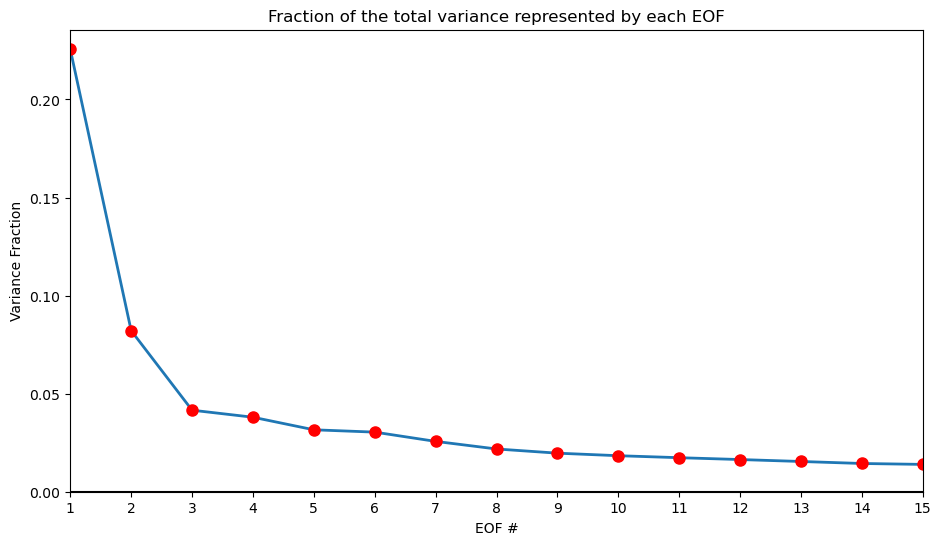

In [13]:
plt.figure(figsize=(11,6))
eof_num = range(1, 16)
plt.plot(eof_num, varfrac[0:15], linewidth=2)
plt.plot(eof_num, varfrac[0:15], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 16))
plt.title('Fraction of the total variance represented by each EOF')
plt.xlabel('EOF #')
plt.ylabel('Variance Fraction')
plt.xlim(1, 15)
plt.ylim(np.min(varfrac), np.max(varfrac)+0.01)

## Part 2: Using xarray/xeof

In [14]:
#url = 'https://oceanwatch.pifsc.noaa.gov/thredds/dodsC/CRW-sst/monthly'
#sst = xr.open_dataset(url).sea_surface_temperature
url = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/HadSST/HadSST3/sst'
sst = xr.open_dataset(url).sst.sel(time=slice('01-01-1980','12-30-2018'))

/Users/jimp/anaconda3/lib/python3.11/site-packages/xarray/coding/times.py:206: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)


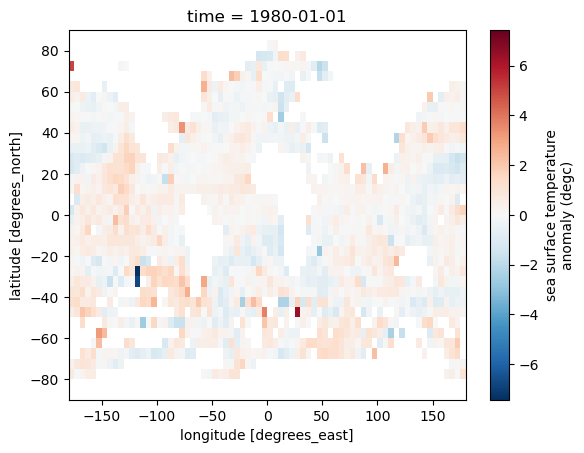

In [15]:
sst.isel(time=0).plot()

Before we modify the data, let's do an EOF analysis on the whole dataset:

In [34]:
# need to remove nan's
sst2 = sst.dropna(dim='time')  

s_model = xe.single.EOF(n_modes=4, use_coslat=True)
s_model.fit(sst2, dim='time')
s_eofs = s_model.components()
s_pcs = s_model.scores()
s_expvar = s_model.explained_variance_ratio()

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [35]:
s_eofs.plot(col='mode')

NameError: name 's_eofs' is not defined

In [36]:
s_pcs.plot(col='mode')

NameError: name 's_pcs' is not defined

In [37]:
s_expvar

NameError: name 's_expvar' is not defined

EOF1 explains 83% of the variance, and the map shows interhemispheric asymmetry. The corresponding PC has a period of one year, which we can see more clearly by only plotting a few years:

In [38]:
s_pcs.sel(mode=1, time=slice('1900', '1903')).plot(figsize=(8, 3))

NameError: name 's_pcs' is not defined

This mode is showing the seasonal cycle. This is interesting, but it obfuscates other modes. If we want to study the other ways Earth's climate varies, we should remove the seasonal cycle from our data. Here we compute this (calling it the SST anomaly) by subtracting out the average of each month using Xarray's `.groupby()` method:

In [39]:
sst_clim = sst.groupby('time.month')
ssta = sst_clim - sst_clim.mean(dim='time')

The remaining 3 EOFs show a combination of the long-term warming trend, the seasonal cycle (EOF analyses do not cleanly separate physical modes), and other internal variability. The warming trend is also interesting (see the [CMIP6 Cookbook](https://projectpythia.org/cmip6-cookbook)), but here we want to pull out some modes of internal/natural variability. We can detrend the data by removing the global average SST anomaly.

In [40]:
def global_average(data):
    weights = np.cos(np.deg2rad(data.lat))
    data_weighted = data.weighted(weights)
    return data_weighted.mean(dim=['lat', 'lon'], skipna=True)

In [41]:
ssta_dt = (ssta - global_average(ssta)).squeeze()

Let's find the global EOFs again but with the deseasonalized, detrended data:

In [42]:
ds_model = xe.single.EOF(n_modes=4, use_coslat=True)
ds_model.fit(ssta_dt, dim='time')
ds_eofs = ds_model.components()
ds_pcs = ds_model.scores()
ds_expvar = ds_model.explained_variance_ratio()

ValueError: Input data contains partial NaN entries, which will cause the the SVD to fail.

In [43]:
ds_eofs.plot(col='mode')

NameError: name 'ds_eofs' is not defined

In [44]:
ds_pcs.plot(col='mode')

NameError: name 'ds_pcs' is not defined

In [45]:
ds_expvar

NameError: name 'ds_expvar' is not defined

Now we can see some modes of variability! EOF1 looks like ENSO or IPO, and EOF2 is probably picking up a pattern of the recent temperature trend where the Southern Ocean and southeastern Pacific are slightly cooling. EOF3 and EOF4 appear to be showing some decadal modes of variability (PDO and maybe AMO), among other things. There is a lot going on in each of these maps, so to get a clearer index of some modes, we can restrict our domain. 

## El Niño Southern Oscillation (ENSO)

Here we restrict our domain to the equatorial Pacific. Note that ENSO is commonly defined using an index of SST anomaly over a region of the equatorial Pacific (e.g., the [Oceanic Niño Index (ONI)](https://www.ncei.noaa.gov/access/monitoring/enso/sst)) instead of an EOF. You can [read more about ENSO here](https://www.ncei.noaa.gov/access/monitoring/enso/).

In [46]:
ep_ssta_dt = ssta_dt.where((ssta_dt.lat < 30) & (ssta_dt.lat > -30) & (ssta_dt.lon > 120) & (ssta_dt.lon < 290), drop=True)

In [47]:
ep_model = xe.single.EOF(n_modes=4, use_coslat=True)
ep_model.fit(ep_ssta_dt, dim='time')
ep_eofs = ep_model.components()
ep_pcs = ep_model.scores()
ep_expvar = ep_model.explained_variance_ratio()

ValueError: Input data contains partial NaN entries, which will cause the the SVD to fail.

In [48]:
ep_eofs.plot(col='mode')

NameError: name 'ep_eofs' is not defined

In [49]:
ep_pcs.plot(col='mode')

NameError: name 'ep_pcs' is not defined

In [50]:
ep_expvar

NameError: name 'ep_expvar' is not defined

NameError: name 'ep_pcs' is not defined

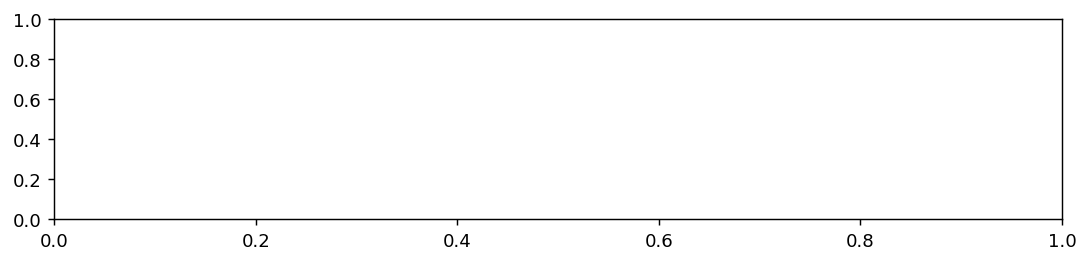

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2), dpi=130)
plt.fill_between(ep_pcs.time, ep_pcs.isel(mode=0).where(ep_pcs.isel(mode=0) > 0), color='r')
plt.fill_between(ep_pcs.time, ep_pcs.isel(mode=0).where(ep_pcs.isel(mode=0) < 0), color='b')
plt.ylabel('PC')
plt.xlabel('Year')
plt.xlim(ep_pcs.time.min(), ep_pcs.time.max())
plt.grid(linestyle=':')
plt.title('ENSO Index (detrended equatorial Pacific SSTA EOF1)')

Compare to the ONI:

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2), dpi=130)
plt.fill_between(ep_pcs.time, ep_pcs.isel(mode=0).where(ep_pcs.isel(mode=0) > 0), color='r')
plt.fill_between(ep_pcs.time, ep_pcs.isel(mode=0).where(ep_pcs.isel(mode=0) < 0), color='b')
plt.ylabel('PC')
plt.xlabel('Year')
plt.xlim(ep_pcs.time.sel(time='1950-01').squeeze(), ep_pcs.time.max())
plt.grid(linestyle=':')
plt.title('ENSO Index (detrended equatorial Pacific SSTA EOF1)')

<img src="images/oni.png" alt="ONI"></img>

## Pacific Decadal Oscillation (PDO)

Here we restrict our domain to the North Pacific. You can [read more about PDO here](https://www.ncei.noaa.gov/access/monitoring/pdo/).

In [ ]:
np_ssta_dt = ssta_dt.where((ssta_dt.lat < 70) & (ssta_dt.lat > 20) & (ssta_dt.lon > 120) & (ssta_dt.lon < 260), drop=True)

In [ ]:
np_model = xe.single.EOF(n_modes=4, use_coslat=True)
np_model.fit(np_ssta_dt, dim='time')
np_eofs = np_model.components()
np_pcs = np_model.scores()
np_expvar = np_model.explained_variance_ratio()

In [ ]:
np_eofs.plot(col='mode')

In [ ]:
np_pcs.plot(col='mode')

In [ ]:
np_expvar

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2), dpi=130)
plt.fill_between(np_pcs.time, np_pcs.isel(mode=0).where(np_pcs.isel(mode=0) > 0), color='r')
plt.fill_between(np_pcs.time, np_pcs.isel(mode=0).where(np_pcs.isel(mode=0) < 0), color='b')
plt.plot(np_pcs.time, np_pcs.isel(mode=0).rolling(time=48, center=True).mean(), color='k', linewidth=2)
plt.ylabel('PC')
plt.xlabel('Year')
plt.xlim(np_pcs.time.min(), np_pcs.time.max())
plt.grid(linestyle=':')
plt.title('PDO Index (detrended North Pacific SSTA EOF1)')

---

## Summary
In this notebook, we demonstrated a basic workflow for performing an EOF analysis on gridded SST data using the `xeofs` package. We plotted the PCs associated with ENSO and PDO using deseasonalized, detrended SSTs.

### What's next?
In the future, additional notebooks may use EOFs to recreate published figures, give an overview of other EOF packages, or explore variations of the EOF method.

## Resources and references
1. Scientific description of the ERSSTv5 data set: [Huang et al. (2017), doi:10.1175/jcli-d-16-0836.1](https://doi.org/10.1175/jcli-d-16-0836.1)
1. [xeofs documentation](https://xeofs.readthedocs.io/)
2. Paper describing the xeofs software: [Rieger et al., (2024) doi:10.21105/joss.06060](https://doi.org/10.21105/joss.06060)